## Workgroup 4
#### Group: 1
#### Members:
- Juan José Tang
- Ursula Cotrina
- Victoria Olivera

## Simulation Design 1

### Case B=50

In [3]:
library(hdm)

set.seed(1)
B= 50 # trials
Naive = rep(0, B)
Orthogonal = rep(0, B)

for (i in 1:B){
    
n=10000
p= 100
beta = 1/(1:p)^2
gamma =1/(1:p)^2

X=matrix(rnorm(n*p), n, p)
    
# %*% producto matricial    
D=   X%*%gamma + rnorm(n)/4

Y = 5*D+ X%*%beta + rnorm(n)

# single selection method

SX.IDs = which(rlasso(Y~ D+X)$coef[-c(1,2)] !=0)  #select covariates by Lasso


if (sum(SX.IDs)==0) {Naive[i] = lm(Y~ D)$coef[2]}

if (sum(SX.IDs)>0) {Naive[i] = lm(Y~ D + X[,SX.IDs])$coef[2]}



#partialling out

resY = rlasso(Y~ X, Post=F)$res
resD = rlasso(D~ X, Post=F)$res
Orthogonal[i]= lm(resY ~ resD)$coef[2]

}

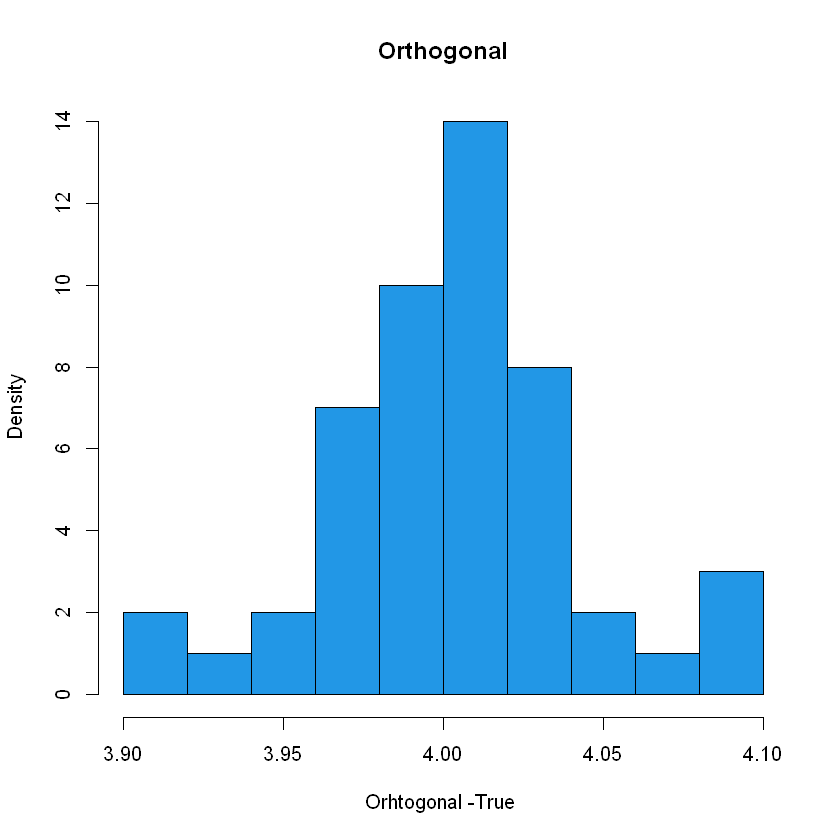

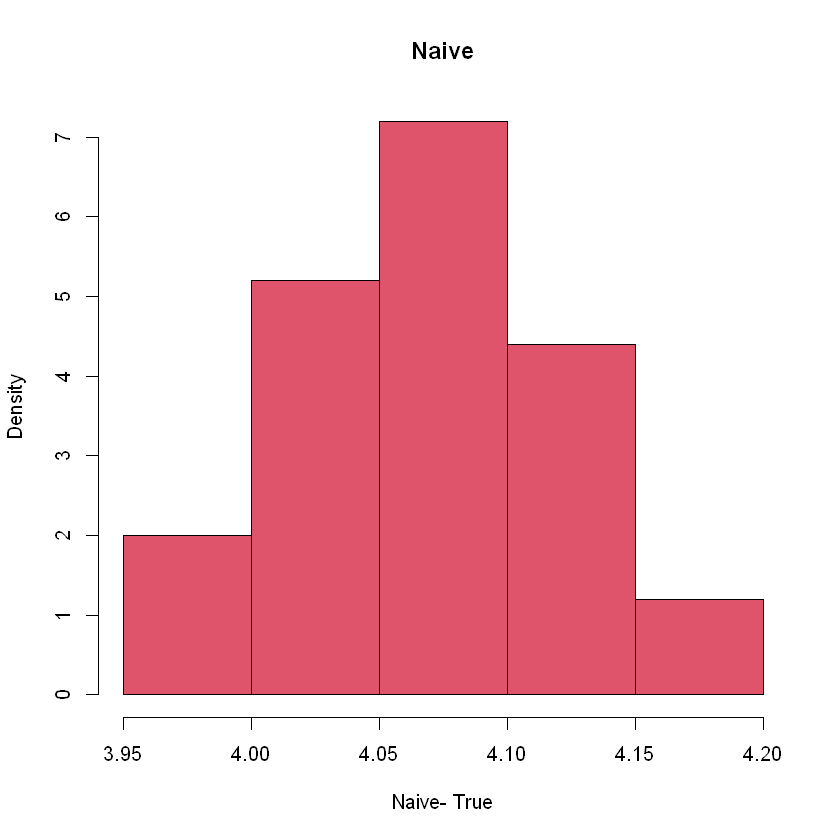

In [5]:
hist(Orthogonal-1,col=4, freq=F, xlab= "Orhtogonal -True ", main="Orthogonal")
hist(Naive-1, col=2, freq=F, xlab= "Naive- True", main = "Naive")

### Case B=100

In [7]:
library(hdm)

set.seed(1)
B= 100 # trials
Naive = rep(0, B)
Orthogonal = rep(0, B)

for (i in 1:B){
    
n=10000
p= 100
beta = 1/(1:p)^2
gamma =1/(1:p)^2

X=matrix(rnorm(n*p), n, p)
    
# %*% producto matricial    
D=   X%*%gamma + rnorm(n)/4

Y = 5*D+ X%*%beta + rnorm(n)

# single selection method

SX.IDs = which(rlasso(Y~ D+X)$coef[-c(1,2)] !=0)  #select covariates by Lasso


if (sum(SX.IDs)==0) {Naive[i] = lm(Y~ D)$coef[2]}

if (sum(SX.IDs)>0) {Naive[i] = lm(Y~ D + X[,SX.IDs])$coef[2]}



#partialling out

resY = rlasso(Y~ X, Post=F)$res
resD = rlasso(D~ X, Post=F)$res
Orthogonal[i]= lm(resY ~ resD)$coef[2]

}

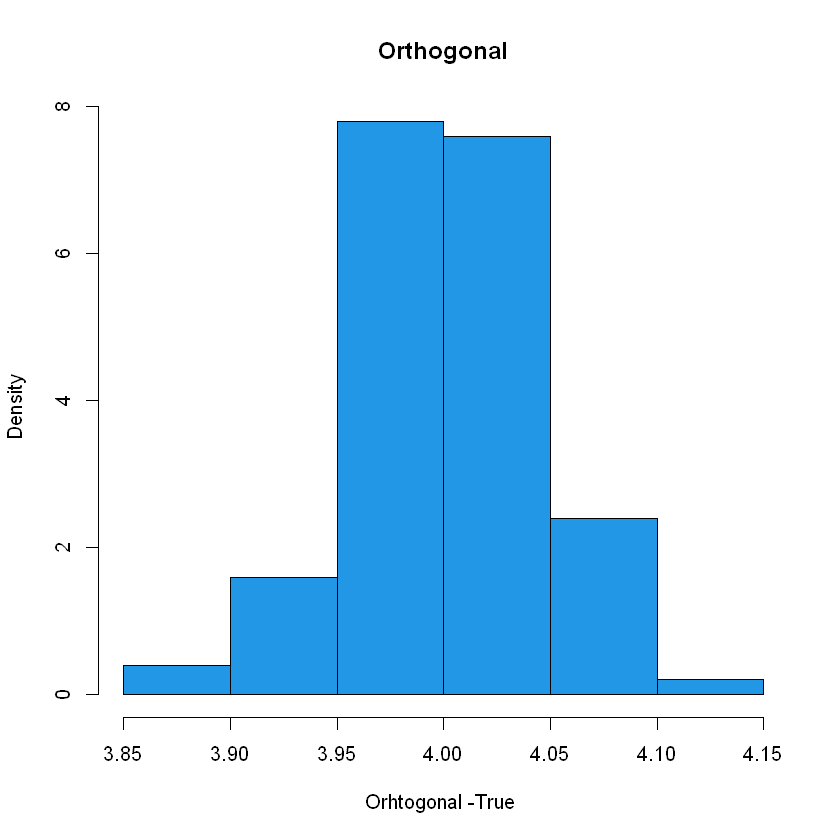

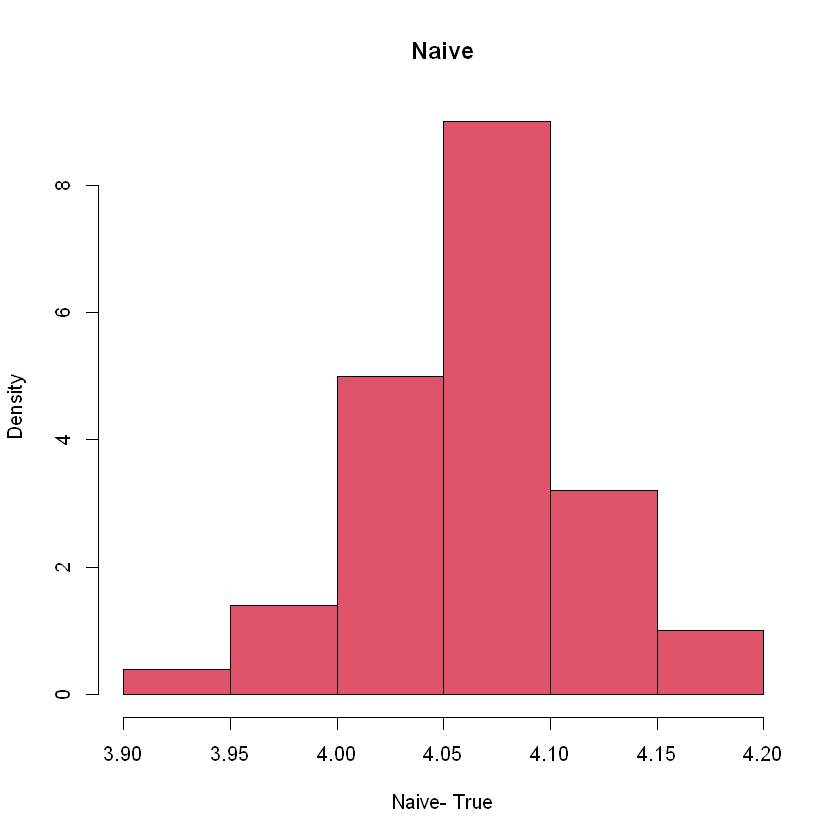

In [8]:
hist(Orthogonal-1,col=4, freq=F, xlab= "Orhtogonal -True ", main="Orthogonal")
hist(Naive-1, col=2, freq=F, xlab= "Naive- True", main = "Naive")

### Case B=1000

In [9]:
library(hdm)

set.seed(1)
B= 1000 # trials
Naive = rep(0, B)
Orthogonal = rep(0, B)

for (i in 1:B){
    
n=10000
p= 100
beta = 1/(1:p)^2
gamma =1/(1:p)^2

X=matrix(rnorm(n*p), n, p)
    
# %*% producto matricial    
D=   X%*%gamma + rnorm(n)/4

Y = 5*D+ X%*%beta + rnorm(n)

# single selection method

SX.IDs = which(rlasso(Y~ D+X)$coef[-c(1,2)] !=0)  #select covariates by Lasso


if (sum(SX.IDs)==0) {Naive[i] = lm(Y~ D)$coef[2]}

if (sum(SX.IDs)>0) {Naive[i] = lm(Y~ D + X[,SX.IDs])$coef[2]}



#partialling out

resY = rlasso(Y~ X, Post=F)$res
resD = rlasso(D~ X, Post=F)$res
Orthogonal[i]= lm(resY ~ resD)$coef[2]

}

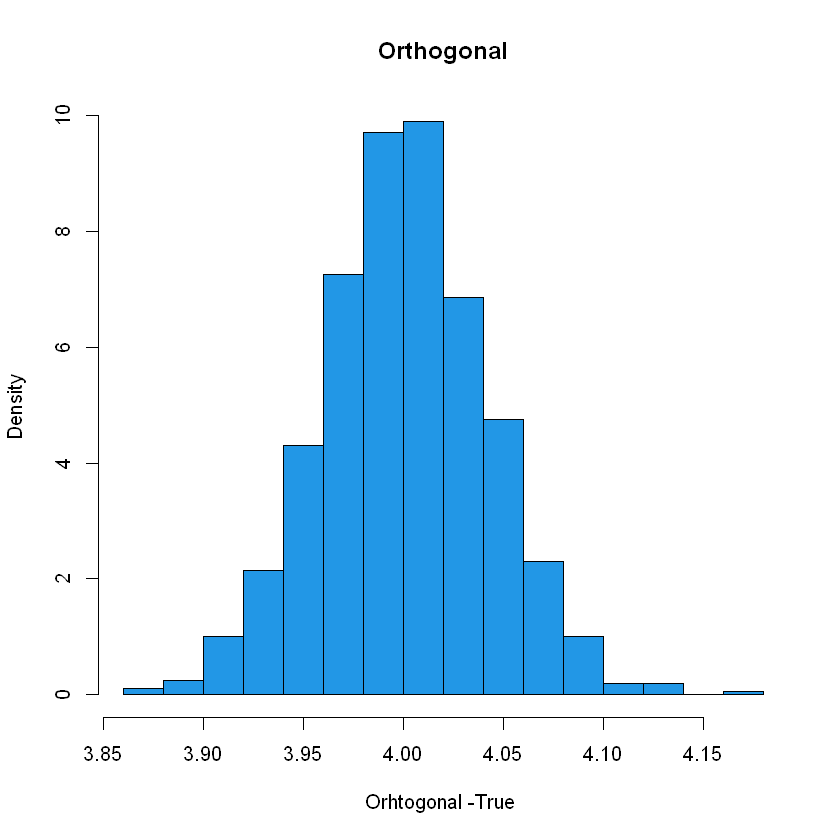

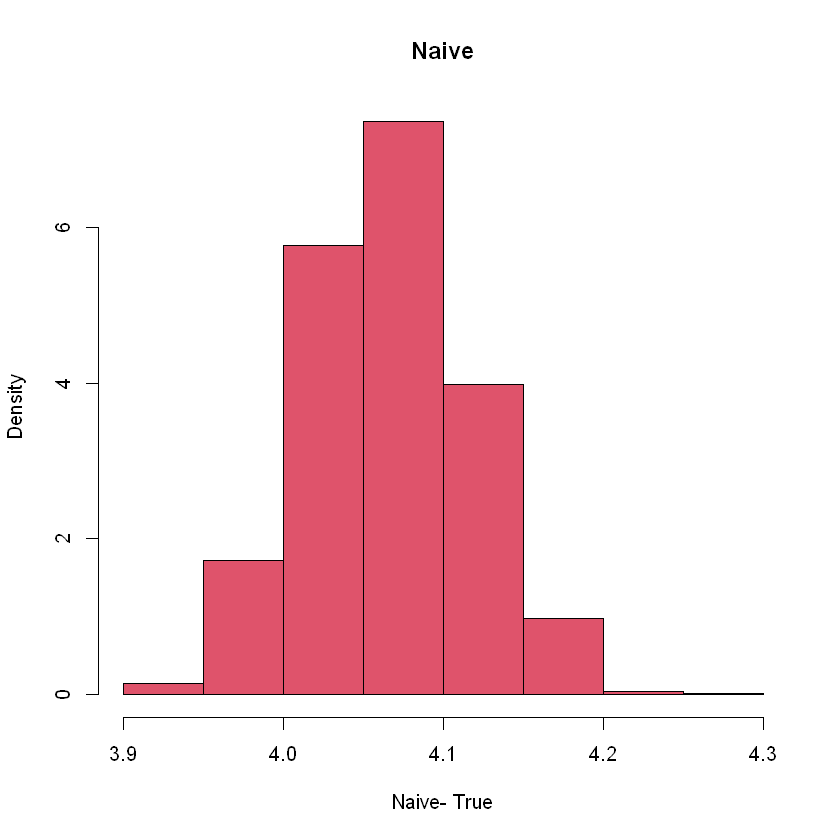

In [11]:
hist(Orthogonal-1,col=4, freq=F, xlab= "Orhtogonal -True ", main="Orthogonal")
hist(Naive-1, col=2, freq=F, xlab= "Naive- True", main = "Naive")

* Explain what you observe in the distribution of the histograms. Where the orthogonal and Naive should be centered?
In the histograms, it is observed that as the number of simulations increases the distribution of the histograms approaches a normal distribution. Both orthogonal and Naive should be centered on the real value of the estimation. However, the naive estimate is biased, thus the naive distribution couldn't be centered on the real value.
* Why does this happen? Give an econometric explanation of this
This happens because as the sample size grows, the distribution centers around the mean. Likewise, by the central limit theorem if a random sample is large enough, the distribution of the mean follows a normal distribution.

## Double Lasso - Testing the Convergence Hypothesis

The Double Lasso approach is an estimation procedure to measure the effect of a variable of interest with respect to a dependent variable, in a context where we have a large number of covariates (probably higher than the sample size). It consists in running two lasso regressions in a partialling-out procedure, while selecting the most appropriate covariates in each step; specifically, the covariates that best predict the dependent variable and/or the independent variable. Lets consider the following model:

$$Y = \beta_1 D + \beta_2^{'}W + \epsilon $$

The Double Lasso procedure starts in running a Lasso Regression of D on W. That is:

$$D = \gamma_{DW}^{'}W + \epsilon_1 $$

And the estimator is given by:

$$\widehat{\gamma_{DW}} = argmin \sum(D - \gamma W_i)^2 + \lambda_1 \sum \hat{\psi}|\gamma_j| $$

Then, we run a Lasso Regression of Y on W.

$$Y = \gamma_{YW}^{'}W + \epsilon_2 $$

And the estimator is given by:

$$\widehat{\gamma_{YW}} = argmin \sum(Y - \gamma W_i)^2 + \lambda_2 \sum \hat{\psi}|\gamma_j| $$

Where $\lambda_1$,$\lambda_2$ are hyperparameters chosen by some estimation techniques (such as Cross Validation).

Finally, to estimate the effect of D on Y we only need to make an OLS regression between $\tilde{Y}$ $\tilde{D}$ without intercept:

$$\tilde{Y} =  \beta_1\tilde{D} + \xi $$

## Data analysis

In [1]:
library(hdm)
library(xtable)
library("ggplot2")

Warning message:
"package 'hdm' was built under R version 4.1.3"
Warning message:
"package 'xtable' was built under R version 4.1.3"
Warning message:
"package 'ggplot2' was built under R version 4.1.3"


In [2]:
save(GrowthData, file = "../../data/GrowthData.RData")

In [3]:
growth <- GrowthData
attach(growth)

## OLS - Aprroach

In [29]:
reg.ols <- lm(Outcome~.-1,data=growth)  # drop intercetp in dataset ( .-1 )
summary(reg.ols)


Call:
lm(formula = Outcome ~ . - 1, data = growth)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.040338 -0.011298 -0.000863  0.011813  0.043247 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
intercept  2.472e-01  7.845e-01   0.315  0.75506   
gdpsh465  -9.378e-03  2.989e-02  -0.314  0.75602   
bmp1l     -6.886e-02  3.253e-02  -2.117  0.04329 * 
freeop     8.007e-02  2.079e-01   0.385  0.70300   
freetar   -4.890e-01  4.182e-01  -1.169  0.25214   
h65       -2.362e+00  8.573e-01  -2.755  0.01019 * 
hm65       7.071e-01  5.231e-01   1.352  0.18729   
hf65       1.693e+00  5.032e-01   3.365  0.00223 **
p65        2.655e-01  1.643e-01   1.616  0.11727   
pm65       1.370e-01  1.512e-01   0.906  0.37284   
pf65      -3.313e-01  1.651e-01  -2.006  0.05458 . 
s65        3.908e-02  1.855e-01   0.211  0.83469   
sm65      -3.067e-02  1.168e-01  -0.263  0.79479   
sf65      -1.799e-01  1.181e-01  -1.523  0.13886   
fert65     6.881e-03  2.705e-02   0.254

In [30]:
est_ols <- summary(reg.ols)$coef["gdpsh465",1]
# output: estimated regression coefficient corresponding to the target regressor

std_ols <- summary(reg.ols)$coef["gdpsh465",2]
# output: std. error

ci_ols <- confint(reg.ols)[2,]
# output: 95% confidence interval

results_ols <- as.data.frame(cbind(est_ols,std_ols,ci_ols[1],ci_ols[2]))  # from matrix to dataframe
colnames(results_ols) <-c("estimator","standard error", "lower bound CI", "upper bound CI")
rownames(results_ols) <-c("OLS")

In [31]:
#library(xtable)
table <- matrix(0, 1, 4)
table[1,1:4]   <- c(est_ols,std_ols,ci_ols[1],ci_ols[2])
colnames(table) <-c("estimator","standard error", "lower bound CI", "upper bound CI")
rownames(table) <-c("OLS")
tab1<- xtable(table, digits = 3)
tab1

,estimator,standard error,lower bound CI,upper bound CI
,<dbl>,<dbl>,<dbl>,<dbl>
OLS,-0.009377989,0.02988773,-0.07060022,0.05184424


## LASSO HDM - Approach

In [32]:
Y <- growth['Outcome'] # output variable
W <- as.matrix(growth)[, -c(1, 2,3)] # controls in matrix is mandatory to use rlassoeffects function
D <- growth['gdpsh465'] # target regressor

In [33]:
r.Y <- rlasso(x=W,y=Y)$res
r.D <- rlasso(x=W,y=D)$res

In [34]:
partial.lasso <- lm(r.Y ~ r.D)

In [35]:
r.Y <- rlasso(x=W,y=Y)$res # creates the "residual" output variable
r.D <- rlasso(x=W,y=D)$res # creates the "residual" target regressor
partial.lasso <- lm(r.Y ~ r.D)
est_lasso <- partial.lasso$coef[2]
std_lasso <- summary(partial.lasso)$coef[2,2]
ci_lasso <- confint(partial.lasso)[2,]

In [36]:
library(xtable)
table <- matrix(0, 1, 4)
table[1,1:4]   <- c(est_lasso,std_lasso,ci_lasso[1],ci_lasso[2])
colnames(table) <-c("estimator","standard error", "lower bound CI", "upper bound CI")
rownames(table) <-c("Lasso HDM")
tab2 <- xtable(table, digits = 3)
# Summary HDM Lasso
tab2

,estimator,standard error,lower bound CI,upper bound CI
,<dbl>,<dbl>,<dbl>,<dbl>
Lasso HDM,-0.04981147,0.01393636,-0.07750705,-0.02211588


## Lasso Cross validation - Approach

In [45]:
#install.packages("glmnet", repos = "https://cran.us.r-project.org")

In [46]:
library(glmnet)

In [47]:
Y1 <- as.matrix(growth)[, 1, drop = F] # output variable
W1 <- as.matrix(growth)[, -c(1, 2,3)] # controls
D1 <- as.matrix(growth)[, 3, drop = F] 

In [48]:
cv.5 <- cv.glmnet(W1, Y1, alpha = 0.00077)
r_Y= Y1-predict(cv.5, newx = W1, type='link') #residual of regression Y on W
cv.7 <- cv.glmnet(W1, D1, alpha = 0.00077)
r_D = D1-predict(cv.7, newx = W1, type='link') #residual of regression D on W

# ols
partial_lasso_fit <- lm(r_Y~r_D)

In [49]:
est_lasso <- partial_lasso_fit$coef[2]
std_lasso <- summary(partial_lasso_fit)$coef[2,2]
ci_lasso <- confint(partial_lasso_fit)[2,]

library(xtable)
table <- matrix(0, 1, 4)
table[1,1:4]   <- c(est_lasso,std_lasso,ci_lasso[1],ci_lasso[2])
colnames(table) <-c("estimator","standard error", "lower bound CI", "upper bound CI")
rownames(table) <-c("LASSO - Cross Validation")
tab3<- xtable(table, digits = 3)
#print(tab2,type="html") # set type="latex" for printing table in LaTeX
tab3

,estimator,standard error,lower bound CI,upper bound CI
,<dbl>,<dbl>,<dbl>,<dbl>
LASSO - Cross Validation,-0.04243275,0.01648179,-0.07518684,-0.009678662


## Double Lasso using Partialling out - Approach

In [41]:
lasso_direct = rlassoEffect(x=W1, y=Y1, d=D1, method = "partialling out")
summary(lasso_direct)$coef[, 1:2]

Estimate.  Std. Error 
-0.04981147  0.01393636

In [42]:
est_lasso = lasso_direct$coefficients
std_lasso = lasso_direct$se
lower_ci_lasso = est_lasso - 1.96*std_lasso
upper_ci_lasso = est_lasso + 1.96*std_lasso

In [43]:
library(xtable)
table <- matrix(0, 1, 4)
table[1,1:4]   <- c(est_lasso,std_lasso,lower_ci_lasso[1],upper_ci_lasso[1])
colnames(table) <-c("estimator","standard error", "lower bound CI", "upper bound CI")
rownames(table) <-c("Double Lasso-PO")
tab4<- xtable(table, digits = 3)
tab4

,estimator,standard error,lower bound CI,upper bound CI
,<dbl>,<dbl>,<dbl>,<dbl>
Double Lasso-PO,-0.04981147,0.01393636,-0.07712673,-0.0224962


## Plotting confidence intervals

In [50]:
sum=rbind(tab1,tab2,tab3,tab4)
sum

,estimator,standard error,lower bound CI,upper bound CI
,<dbl>,<dbl>,<dbl>,<dbl>
OLS,-0.009377989,0.02988773,-0.07060022,0.051844243
Lasso HDM,-0.049811465,0.01393636,-0.07750705,-0.022115881
LASSO - Cross Validation,-0.042432752,0.01648179,-0.07518684,-0.009678662
Double Lasso-PO,-0.049811465,0.01393636,-0.07712673,-0.022496203


In [51]:
nb<-data.frame(sum)
nb

,estimator,standard.error,lower.bound.CI,upper.bound.CI
,<dbl>,<dbl>,<dbl>,<dbl>
OLS,-0.009377989,0.02988773,-0.07060022,0.051844243
Lasso HDM,-0.049811465,0.01393636,-0.07750705,-0.022115881
LASSO - Cross Validation,-0.042432752,0.01648179,-0.07518684,-0.009678662
Double Lasso-PO,-0.049811465,0.01393636,-0.07712673,-0.022496203


In [52]:
attach(nb)

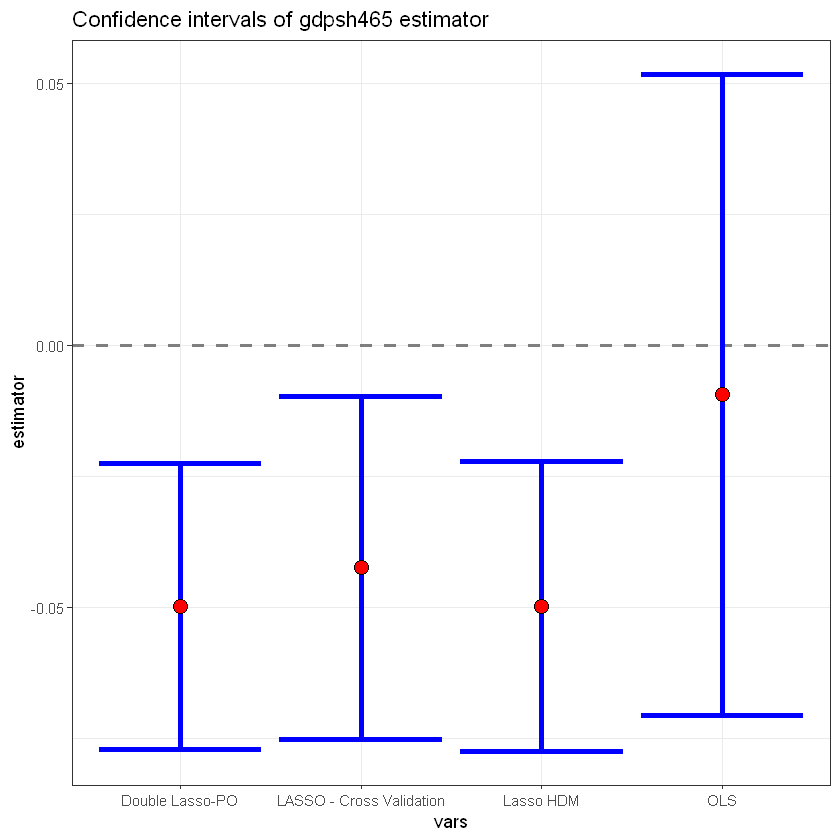

In [53]:
vars=c("OLS","Lasso HDM","LASSO - Cross Validation","Double Lasso-PO")
ggplot(nb, aes(vars, estimator)) +
  geom_hline(yintercept=0, lty=2, lwd=1, colour="grey50")+ 
  geom_errorbar(aes(ymin = lower.bound.CI,ymax = upper.bound.CI),colour="blue",lwd=1.5)+
  geom_point(size=4, pch=21, fill="red") +
  theme_bw()+
  ggtitle("Confidence intervals of gdpsh465 estimator")

## Neyman Orthogonality 

We have the following linear regression:

$$Y = \alpha D + \beta W' + \epsilon$$

Where: $\alpha$ is the target paramter, $\gamma_{DW}'$ is the estimator of lasso regression D on W and $\gamma_{YW}'$ is the estimator of lasso regression Y on W. On the other hand, $\tilde{Y}$ and $\tilde{D}$ are residuals from the estimation:

$$\tilde{Y} = Y-\gamma_{YW}'W$$

$$\tilde{D} = D- \gamma_{DW}'W$$

Then, we get the vector $\eta^{0}$ with true values:
$$\eta^{0} = (\gamma_{DW}',\gamma_{YW}')'$$

In this case, $\alpha$ is a function of $\eta$, so $\alpha=\alpha(\eta)$ and $\eta=(\eta_{1}',\eta_{2}')$

We want to demonstrate that, in first orden, $\alpha$ is insensitive to local perturbations around the true value $\eta^{0}$.

$$D = \dfrac {\partial \alpha(\eta^{0})}{\partial \eta}=0$$

Let's propose:
$$\tilde{Y} = a \tilde{D} + \mu$$

where $\alpha=\arg\min_{a \in \mathbb R}E(\tilde{Y}-a\tilde{D})^2$. $\alpha$ is the true value of $a$, since $a=\alpha$ solves the equation:

$$E(\tilde{Y}-a\tilde{D})\tilde{D}=0$$

Based on the following condition (equation number 1):

$$M(a,\eta)=E[(\tilde{Y}(\eta_{1})-a\tilde{D}(\eta_{2}))\tilde{D}(\eta_{2})]$$

Where: $\tilde{Y}(\eta_{1})=Y-\eta_{1}'W$ and $\tilde{D}(\eta_{2})=D-\eta_{2}'W$.

Corresponding to the true values $\eta=\eta^{0}$:

$$\tilde{Y}=Y-\gamma_{YW}'W ; \tilde{D}=D-\gamma_{DW}'W$$

By the implicit function theorem:

$$\dfrac {\partial a}{\partial \eta}=-\partial_{a}M(\alpha,\eta^{0})^{-1}\partial_{\eta}M(\alpha,\eta^{0})$$

Remember that we want to demonstrate $\dfrac {\partial \alpha(\eta^{0})}{\partial \eta}=0$

As we observe, the first component $\partial_{a}M(\alpha,\eta^{0})$ can not be zero, so to get what we want, $\partial_{\eta}M(\alpha,\eta^{0})$ must be zero.

The second componet is:

$$\dfrac {\partial M(\alpha,\eta^{0})}{\partial \eta}=\dfrac {\partial M(\alpha,\eta^{0})}{\partial \eta_{1}}+\dfrac {\partial M(\alpha,\eta^{0})}{\partial \eta_{2}}$$

Solving:

$$\dfrac {\partial M(\alpha,\eta^{0})}{\partial \eta_{1}}=E[\dfrac {\partial \tilde{Y}(\eta_{1})}{\partial \eta_{1}}\tilde{D}] $$

As we know: $\tilde{Y} = Y-\eta_{1}'W$

$$\dfrac {\partial \tilde{Y}}{\partial \eta_{1}}=-W $$

Then:

$$\dfrac {\partial M(\alpha,\eta^{0})}{\partial \eta_{1}}=E[-W\tilde{D}]=0$$

Now:

$$\dfrac {\partial M(\alpha,\eta^{0})}{\partial \eta_{2}}=E[(-a\dfrac {\partial \tilde{D}(\eta_{2})}{\partial \eta_{2}})\tilde{D} + \dfrac {\partial \tilde{D}(\eta_{2})}{\partial \eta_{2}}(\tilde{Y}-a\tilde{D})] $$

As we know: $\tilde{D} = D-\eta_{2}'W$

$$\dfrac {\partial \tilde{D}}{\partial \eta_{2}}=-W $$

Then:

$$\dfrac {\partial M(\alpha,\eta^{0})}{\partial \eta_{2}}=E[-a(-W)\tilde{D}+(-W)(\tilde{Y}-a\tilde{D})] $$

$$\dfrac {\partial M(\alpha,\eta^{0})}{\partial \eta_{2}}=-E(W\tilde{Y})+2E(\alpha W\tilde{D})=0 $$

Thus, we have shown that is true that $\dfrac {\partial M}{\partial \eta_{1}}=0$ and $\dfrac {\partial M}{\partial \eta_{2}}=0$. It means that $\dfrac {\partial \alpha(\eta^{0})}{\partial \eta}=0$.
